# Figure 10(b): Classwise evaluation on human.

[:simple-jupyter: :material-download:](../../paper_tables_and_figures/figure10b_icdm_finetuning_per_class_metrics_on_human/figure10b_icdm_finetuning_per_class_metrics_on_human.ipynb)

In [1]:
import pathlib

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.stats.api as sms

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
def compute_confidence_intervals(array, alpha=0.05):
    array = np.array(array)
    low, high = sms.DescrStatsW(array).tconfint_mean(alpha)
    mean = array.mean()
    ci = high - mean
    return ci

In [3]:
path = pathlib.Path(
    "./campaigns/ucdavis-icdm19-git-repo-forked/artifacts/IncrementalSampling_Retraining(human-triggered)_20/"
)

class_reps = list(path.glob("*class_rep.csv"))

per_cls = np.stack(
    [
        pd.read_csv(file)[:5][["Accuracy", "precision", "recall", "f1-score"]].values
        for file in class_reps
    ],
    axis=0,
)


means = np.mean(per_cls, axis=0)

cis = np.zeros([per_cls.shape[1], per_cls.shape[2]])
for i in range(per_cls.shape[1]):
    for j in range(per_cls.shape[2]):
        cis[i, j] = compute_confidence_intervals(per_cls[:, i, j])

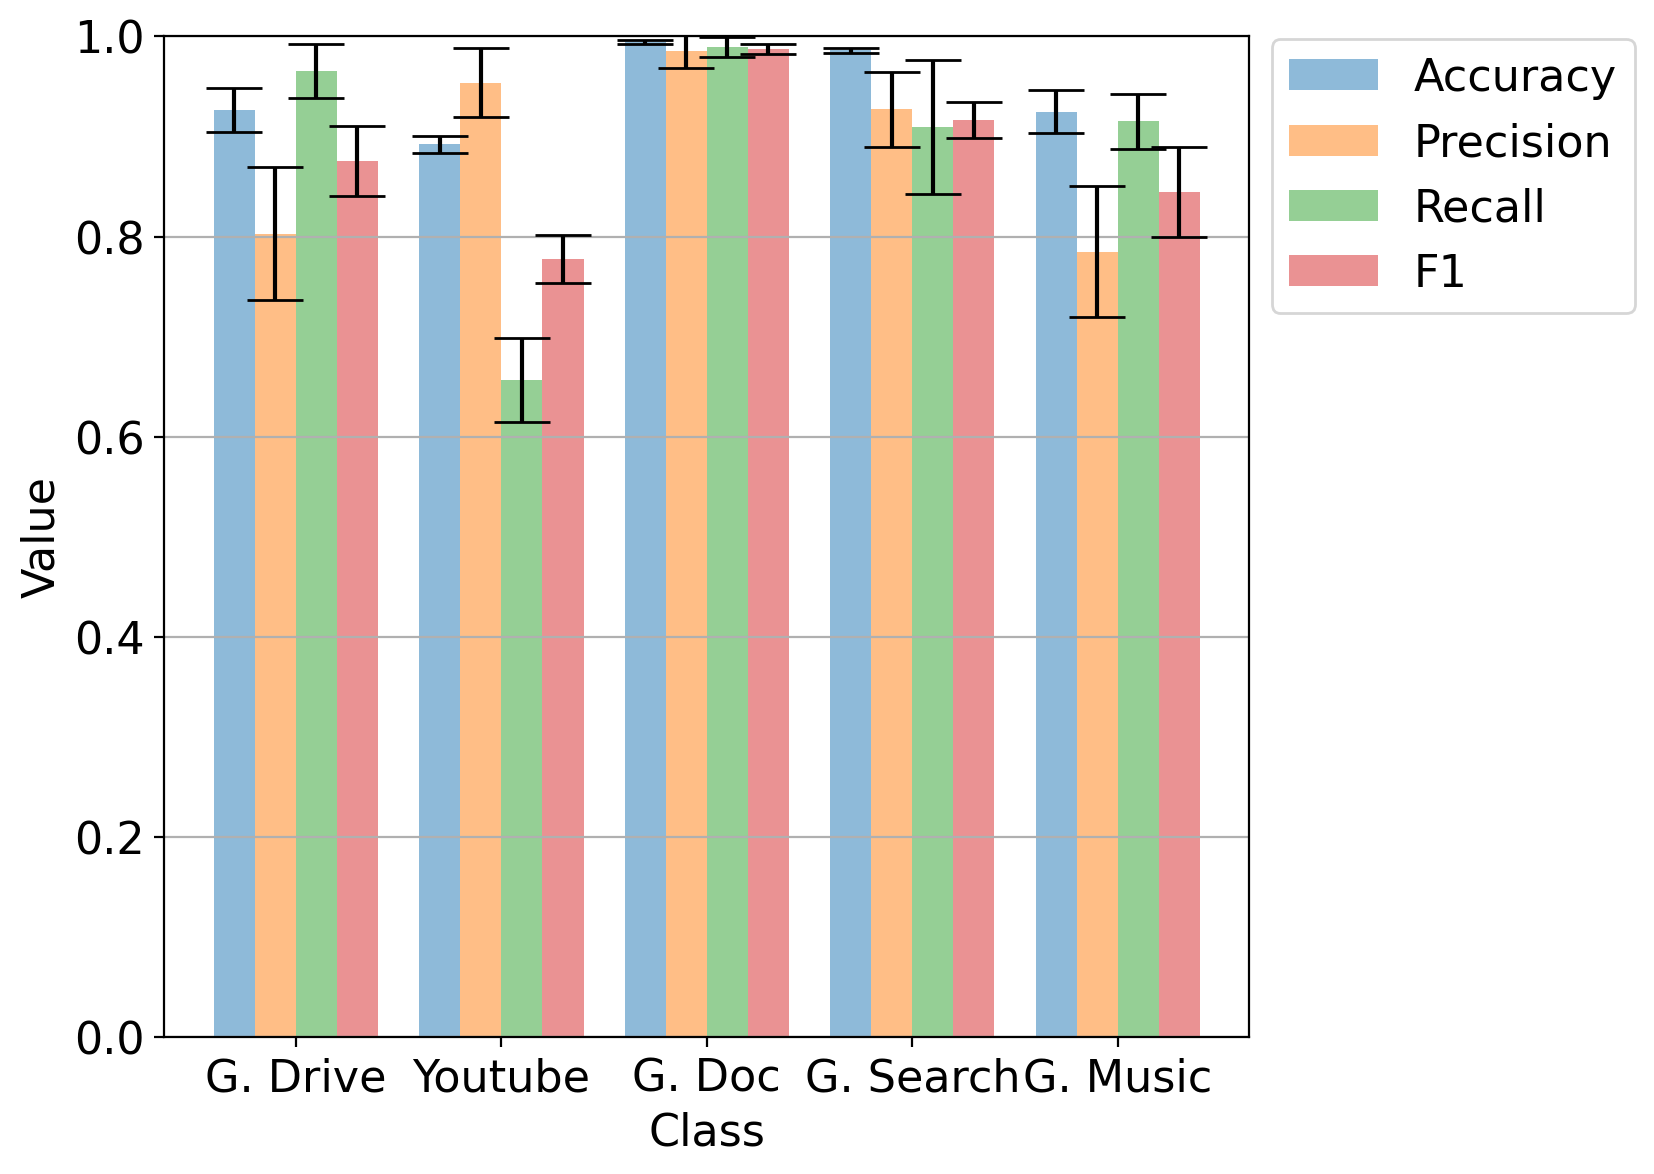

In [9]:
X = ["G. Drive", "Youtube", "G. Doc", "G. Search", "G. Music"]
X_axis = np.arange(len(X))

plt.rcParams.update({'font.size': 16})

fig, ax = plt.subplots(figsize=(7, 6.5))
ax.bar(
    X_axis - 0.3,
    means[:, 0],
    0.2,
    label="Accuracy",
    yerr=cis[:, 0],
    ecolor="black",
    alpha=0.5,
    capsize=10,
)
ax.bar(
    X_axis - 0.1,
    means[:, 1],
    0.2,
    label="Precision",
    yerr=cis[:, 1],
    ecolor="black",
    alpha=0.5,
    capsize=10,
)
ax.bar(
    X_axis + 0.1,
    means[:, 2],
    0.2,
    label="Recall",
    yerr=cis[:, 2],
    ecolor="black",
    alpha=0.5,
    capsize=10,
)
ax.bar(
    X_axis + 0.3,
    means[:, 3],
    0.2,
    label="F1",
    yerr=cis[:, 3],
    ecolor="black",
    alpha=0.5,
    capsize=10,
)


plt.xticks(X_axis, X)
ax.set_xlabel("Class")
ax.set_ylabel("Value")
ax.set_ylim([0, 1])
plt.legend()
ax.legend(bbox_to_anchor=(1, 1.02))
plt.grid(axis="y")

plt.savefig("icdm19_fig3b_replicate_human_ci.png", dpi=300, bbox_inches="tight")